<a href="https://colab.research.google.com/github/marianakwi/ML_2122/blob/main/Lab2_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratory Session 2 -- Assignment

To be delivered until 2022-12-16 23:59:59.

## Section 1 -- Linear Regression

**1.** Consider a dataset with 100 observations, containing a single predictor and a quantitative response. Two different models are fitted to the data, a linear regression ($m_1: Y = \beta_0 + \beta_1 X + \epsilon$) and a cubic regression ($m_2: Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$).

**1.a)** Suppose that the actual relation between X and Y is linear. Can the **training** residual sum of squares (RSS) of the linear model be expected to be smaller, larger or equal to the one from the cubic model? Or is there no information to tell? Justify your answer.

In [ ]:
'The RRS is expected to be smaller for the cubic regression model (m2), as it is expected to overfit the training data.'

'The RRS is expected to be smaller for the cubic regression model (m2), as it is expected to overfit the training data.'

**1.b)** Answer question 1.a) considering the test RSS rather than the training RSS.

In [ ]:
'The test RRS is expected to be smaller for the linear regression model (m1), as the actual relation between X and Y is linear. '
' Being m2 a model that overfits the training data, it will perform poorely on the testing data.'

' Being m2 a model that overfits the training data, it will perform poorely on the testing data.'

**1.c)** Suppose that the actual relationship between X and Y is not linear, but it is not known how far it is from being linear. What is it expected of the the **training** RSS for the linear compared with the cubic models? Or is there not enough information? Justify your answer.

In [ ]:
'The RSS will be larger for the linear model (m1), because this model will not fit the training data as well as a cubic model.'

'The RSS will be larger for the linear model (m1), because this model will not fit the training data as well as a cubic model.'

**1.d)** Answer question 1.c) considering the test RSS rather than the training RSS.

In [ ]:
'There is not information enough to answer this question. Model m2 can or not be overfitting the data,'
'and model m1 can or not be poor enough to represent a non linear relation between X amd Y.'

'and model m1 can or not be poor enough to represent a non linear relation between X amd Y.'

**2.a)** Load the dataset "wine.csv". Do not change the dataset file.

In [ ]:
import numpy as np 
import pandas as pd 
import sklearn 

df = pd.read_csv('winequality.csv', delimiter=';')

df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,red,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,red,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,red,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red,5


**2.b)** Encode the feature "type".

In [ ]:
pd.get_dummies(df['type'])

dummies = pd.get_dummies(df['type'])

df = df.drop('type', axis = 1)
df = df.join(dummies)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red,white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0


**2.c)** Perform a simple linear regression considering *quality* as the response and *pH* as the predictor. Given the results, comment on the following statements:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df['pH'].values.reshape(-1, 1)
y = df['quality'].values.reshape(-1, 1)

m1 = LinearRegression()
m1.fit(X, y)


LinearRegression()

    i) Are the predictor and response statistically related?

In [ ]:
df['pH'].corr(df['quality'])


0.019505703714435902

The correlation between the predictor and response is very low, consequently the they are not statistically related.

    ii) How strong is the relationship between predictor and response? (*Hint: comment on the R^2 score of the model*)

In [ ]:
y_pred = m1.predict(X)
r2_value = r2_score(y, y_pred)
print('R^2: {:.4f}'.format(r2_value))

R^2: 0.0004


Since the value of R2 score is very low (0.0004), one can conclude that the  relationship between the predictor and the response is very weak, as only 0.04% of the variability of 'quality' is explained by the linear regression of 'pH'.

    iii) Is the relationship between the predictor and response positive or negative?

In [ ]:
print('quality_predicted = {:.4f} + {:.4f} * pH'.format(m1.intercept_[0], m1.coef_[0][0]))

quality_predicted = 5.4774 + 0.1059 * pH


The relation between the predictor and response is positive because the coefficient β1 is positive (β1 = 0.1059).

    iv) What is the predicted value of quality when the pH is 9?

In [ ]:
5.4774 + 0.1059 * 9

6.4305

**2.d)** Plot a scatter plot of the response and predictor, along with the regression line.

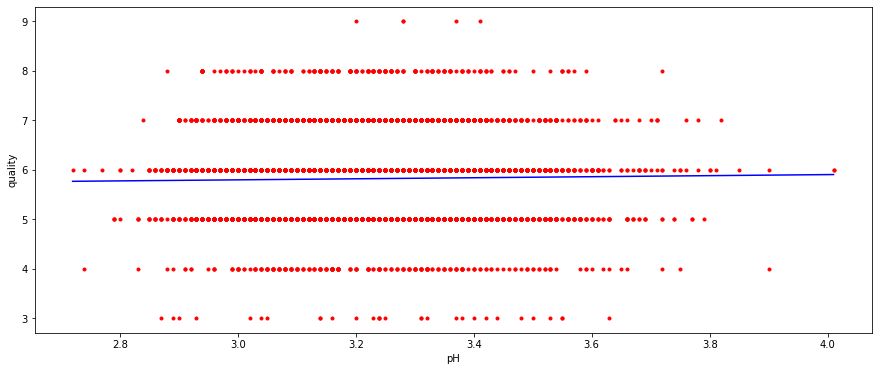

In [ ]:
import matplotlib.pyplot as plt

pH = np.array([min(X), max(X)])
quality_pred = m1.intercept_[0] + m1.coef_[0][0]*pH

plt.rcParams['figure.figsize'] = [15, 6]
plt.plot(df['pH'], df['quality'], '.r')
plt.plot(pH, quality_pred, 'b-')
plt.xlabel('pH')
plt.ylabel('quality')
plt.show()

## Section 2 -- Classification

**3)** Suppose that a dataset is divided into two equally-sized training and test sets, and then try out two different classification procedures:

* The first is the logistic regression, obtaining an error rate of 20% on the training data and 30% on the test data.
* The second is a 1-nearest neighbors, with an average error rate (averaged over test and training datasets) of 18%.

Based on these results, which method is preferred for classifying new observations? Why?

In [ ]:
'A k-NN model fits a specific point in the data with the k nearest data points in your training set. For 1-NN this point depends only of 1 single other point.'
' Consequently, the model will be really close to the training data, presenting a low training error, however it will probably perform very poorly on the testing set. '
' We can not be completly sure about these assumptions, but it is most likely the training error to be closer to 0% and the test error greater than  30%'

'Like this, the first method is preferred, as it assures a test error of 30%.'

'Like this, the first method is preferred, as it assures a test error of 30%.'

**4.a)** Create a new column, "quality7", that contains a 1 if quality contains a value equal or above 7, and a 0 if quality contains a value below 7. Drop the original column "quality".

In [ ]:
df['quality7'] = (df['quality'] >= 7).astype(int)

df = df.drop('quality', axis = 1)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red,white,quality7
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,0,0


**4.b)** Do a correlation matrix plot between all the columns to evaluate which features are linearly correlated. Consider a statistical significance of 0.1%. Describe your findings, with a focus on evaluating which features are most related with "quality7".

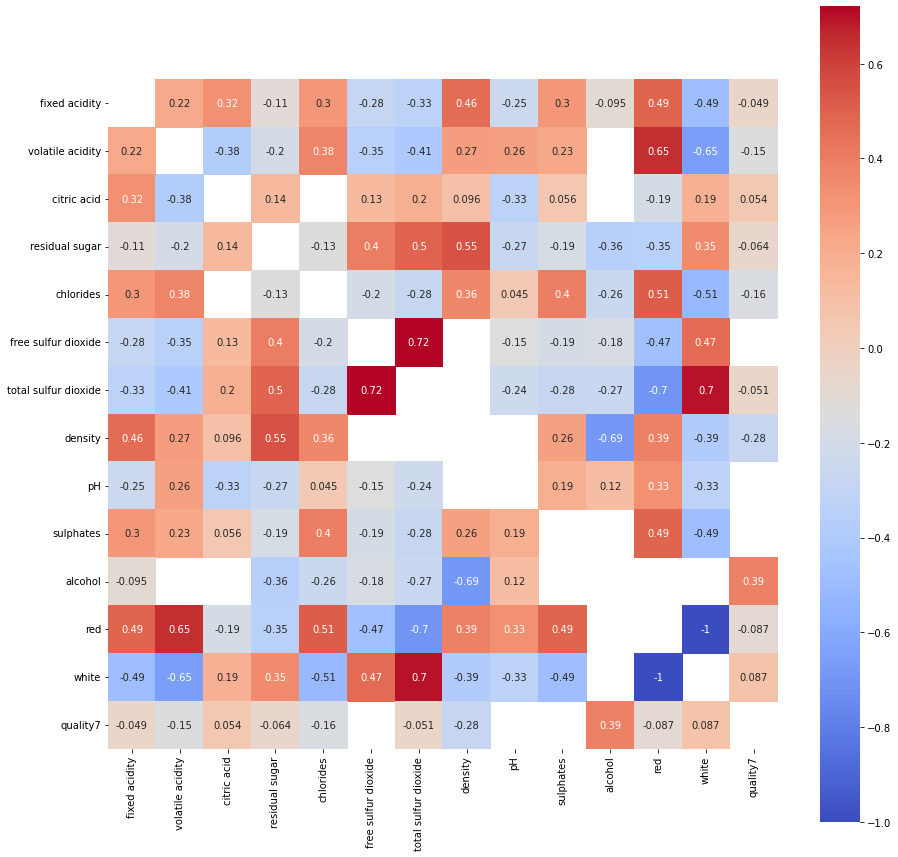

In [ ]:
from scipy.stats import pearsonr
import seaborn as sb
import matplotlib.pyplot as plt 

df_corrs = df.corr(method='pearson')


pval = df.corr(method=lambda x, y: pearsonr(x, y)[1])

ptg_stat_sig = 0.1/100
mask = pval > ptg_stat_sig

plt.subplots(figsize=(15, 15))
heatmap = sb.heatmap(df_corrs, mask = mask, square = True, cmap = 'coolwarm', annot = True)

* 'white' and 'red' are completly correlated, as expected, because they result 

* from encoding the same attribute, so one of them can de dropped as they provide the same information.

* 'Total sulfur dioxide' and 'fee sulfur dioxide' features are strongly correlated (a linear relationship may  exist between them) so one of them could be drop as they contain the nearly same information. The same occurs for 'Total sulfur dioxide' and 'white'/'red'.

* No attribute is highly correlated ( or anticorrelated) with 'quality7', so a linear relationship may not exist between any attribute and  target - considering 'quality7' the target.

* The feature which has most correlation with 'quality7' is alcohol, since it has the higher absolute value of Pearson correlation coefficient, 0.39. This correlation is positive, since the Pearson correlation coefficient is positive. Looking now to the negative correlation, the highest is presented in feature density with a -0.28 value.

* On the other hand, the features that have least correlation with quality7 are 'free sulfur dioxide', 'pH' and 'sulphates' having a correlation coefficient lower than 0.01. The features 'fixed aciditicy', 'citric acid', 'residual sugar', 'total sulfur dioxide' and 'white' are also have a very low correlated with the target, with a coefficient lower than 0.1.

**4.c)** Create the inputs as all the predictors and outputs as the "quality7" feature. Split the data into test and training datasets. Consider a test dataset comprised of 30% of the whole dataset.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = df.drop('red', axis = 1)

X = df.iloc[:,:-1].values
y =df['quality7'].values

sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**4.d)** Perform LDA on the training data in order to predict "quality7" using the remaining variables. What is the test error of the model obtained?

In [ ]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

lda = LDA()
m1 = lda.fit(X_train, y_train)

#train the model on the training data
m1.fit(X_train,y_train)

#predict the targets for test data 
y_pred1 = m1.predict(X_test)

def error_results(y_true,y_pred):
    print('r2: ', r2_score(y_true, y_pred))
    print('MSE: ',mean_squared_error(y_true, y_pred))
    print('Accuracy ', accuracy_score(y_true, y_pred))

error_results(y_test,y_pred1)

r2:  -0.17061621763816115
MSE:  0.18256410256410258
Accuracy  0.8174358974358974


**4.e)** Perform QDA on the training data in order to predict "quality7" using the remaining variables. What is the test error of the model obtained?

In [ ]:
from sklearn.discriminant_analysis import  QuadraticDiscriminantAnalysis as QDA
qda = QDA()
m2 = qda.fit(X_train, y_train)

#train the model on the training data
m2.fit(X_train,y_train)

#predict the targets for test data 
y_pred2 = m2.predict(X_test)


error_results(y_test,y_pred2)

r2:  -0.36462283797706996
MSE:  0.2128205128205128
Accuracy  0.7871794871794872


**4.f)** Perform logistic regression on the training data in order to predict "quality7" using the remaining variables. What is the test error of the model obtained?

In [ ]:
from sklearn.linear_model import  LogisticRegression
lr = LogisticRegression()
m3 = lr.fit(X_train, y_train)

#train the model on the training data
m3.fit(X_train,y_train)

#predict the targets for test data 
y_pred3 = m3.predict(X_test)


error_results(y_test,y_pred3)

r2:  -0.1278689962075541
MSE:  0.1758974358974359
Accuracy  0.8241025641025641


**4.g)** Perform naive Bayes on the training data in order to predict "quality7" using the remaining variables. What is the test error of the model obtained?

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
m4 = nb.fit(X_train, y_train)

#train the model on the training data
m4.fit(X_train,y_train)

#predict the targets for test data 
y_pred4 = m4.predict(X_test)


error_results(y_test,y_pred4)

r2:  -0.6276826621654208
MSE:  0.25384615384615383
Accuracy  0.7461538461538462


**4.h)** Perform KNN on the training data, with several values of K, in order to predict "quality7" using the remaining variables. What test errors are obtained? Which value of K seems to perform the best on this data set?

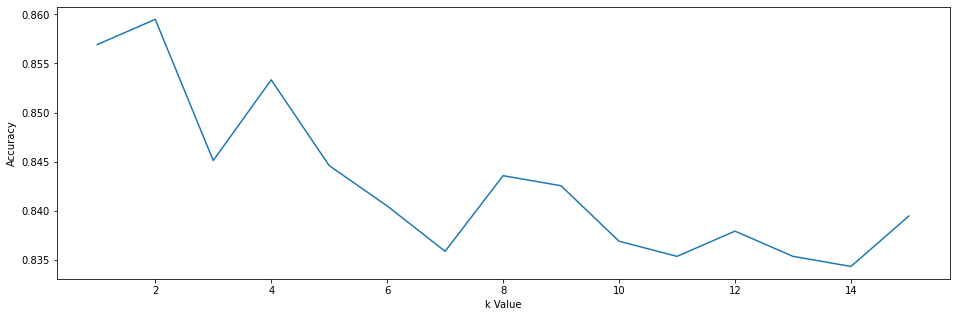

Tuned Hyperparameters : {'n_neighbors': 2}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier() 

## Initialize a list to store the accuracies
knn_limit = 15
accuracies = np.zeros(knn_limit)

## Access the custom created KNN function to calculate the accuracy for each number of neighbors
for i in range(knn_limit):
    KNN_i = KNeighborsClassifier(n_neighbors=i+1)
    mi = KNN_i.fit(X_train,y_train)
    accuracies[i] = mi.score(X_test, y_test)
  
## Plot the results
plt.subplots(figsize=(16, 5))
plt.plot([i+1 for i in range(knn_limit)], accuracies)
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.show()
################################################################################
#HYPERPARAMETER TUNNING
parameters = { 'n_neighbors' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15] }
model = GridSearchCV(KNN,               # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy')              # metric for scoring

model.fit(X_train,y_train)
train_score = model.best_score_
#Print  the tuned-hyperparameters and the training accuracy
print("Tuned Hyperparameters :", model.best_params_)


In [ ]:
KNN1 = KNeighborsClassifier(n_neighbors=2) #K =2
m5 = KNN1.fit(X_train, y_train)

#train the model on the training data
m5.fit(X_train,y_train)

#predict the targets for test data 
y_pred5 = m5.predict(X_test)


error_results(y_test,y_pred5)

r2:  0.09902010215489843
MSE:  0.14051282051282052
Accuracy  0.8594871794871795


**4.i)** Calculate the area under curve (AUC) for the LDA, QDA, logistic regression, naive Bayes and for the best value of K for the KNN method. Compare the results.

In [ ]:
from sklearn.metrics import roc_auc_score

# criar var true pos, false pos
def true_var(model, X_test, y_test):
  cols_to_store = [i for i in range(len(model.classes_)) if model.classes_[i] == 1]
  y_pred1_true = model.predict_proba(X_test)[:,cols_to_store]
  y_test_true = (y_test.copy() == 1).copy()
  return y_test_true, y_pred1_true

y_test_true1, y_pred1_true1 =true_var(m1, X_test, y_test)
y_test_true2, y_pred1_true2 =true_var(m2, X_test, y_test)
y_test_true3, y_pred1_true3 =true_var(m3, X_test, y_test)
y_test_true4, y_pred1_true4 =true_var(m4, X_test, y_test)
y_test_true5, y_pred1_true5 =true_var(m5, X_test, y_test)


# Print scores of Area under curve (AUC)
print('AUC'.rjust(25))
print('{}: {:.3f}'.format('LDA'.rjust(19), roc_auc_score(y_test_true1, y_pred1_true1)))
print('{}: {:.3f}'.format('QDA'.rjust(19), roc_auc_score(y_test_true2, y_pred1_true2)))
print('{}: {:.3f}'.format('Logistic Regression'.rjust(19), roc_auc_score(y_test_true3, y_pred1_true3)))
print('{}: {:.3f}'.format('Naive Bayes'.rjust(19), roc_auc_score(y_test_true4, y_pred1_true4)))
print('{}: {:.3f}'.format('KNN'.rjust(19), roc_auc_score(y_test_true5, y_pred1_true5)))

                      AUC
                LDA: 0.815
                QDA: 0.843
Logistic Regression: 0.824
        Naive Bayes: 0.767
                KNN: 0.815


All the results are higher that 0.7 (70%), which means that all models have at least 70% chance to distinguish between positive and negative classes, showing relatively good results. The models that performed the best accordingly AUC values were the QDA this model had the higher value of AUC, 0.843.

On the other hand, the model which has the worst results is the Naive Bayes model, having the lowest value of AUC, 0.767.

**4.j)** Plot the ROC curves for the 5 methods. Compare the results.

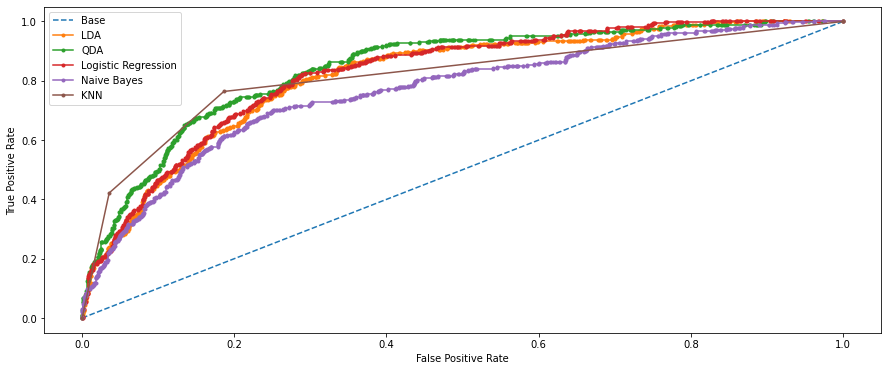

In [ ]:
from sklearn.metrics import roc_curve


# Calculate ROC curves
lr_fpr1, lr_tpr1, _ = roc_curve(y_test_true1, y_pred1_true1 )
lr_fpr2, lr_tpr2, _ = roc_curve(y_test_true2, y_pred1_true2)
lr_fpr3, lr_tpr3, _ = roc_curve(y_test_true3, y_pred1_true3 )
lr_fpr4, lr_tpr4, _ = roc_curve(y_test_true4, y_pred1_true4)
lr_fpr5, lr_tpr5, _ = roc_curve(y_test_true5, y_pred1_true5 )

# Plot the ROC curve for the model
plt.subplots(figsize=(15, 6))
plt.plot([0,1], [0,1], linestyle='--', label = 'Base')
plt.plot(lr_fpr1, lr_tpr1, marker='.', label = 'LDA')
plt.plot(lr_fpr2, lr_tpr2, marker='.', label = 'QDA')
plt.plot(lr_fpr3, lr_tpr3, marker='.', label = 'Logistic Regression')
plt.plot(lr_fpr4, lr_tpr4, marker='.', label = 'Naive Bayes')
plt.plot(lr_fpr5, lr_tpr5, marker='.', label = 'KNN')

# Axis Labels
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


The results of the ROC confirm the results of the AUC, where the QDA model is the one whith better performance, which can be seen by the way the curves are closer to the true positive rate of 1. Whereas the Naive Bayes model is the curve furthest to the true positive rate value 1, having worst outcomes.

## Section 3 -- Bootstrap and k-Fold

**5.a)** Explain how the leave-one-out cross validation (LOOCV) is implemented.

**5.b)** What are the advantages and disadvantages of k-Fold cross-validation relative to:

1. Validation set approach.
2. Leave One Out Cross-Validation (LOOCV)

## Section 4 -- Other Questions

**6)** In your group's option, what are the advantages and disadvantages of using a virtual environment when programming in Python?

**7)** In your group's opinion, in what circumstances is it better to use Jupyter Notebooks and when is it better to use Google Colab notebooks? Give some specific examples.

**8)** Enter your GitHub repository webpage.